In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


###Ekush
A Multipurpose and Multitype Comprehensive Database for Online Off-line Bangla Handwritten Characters. Ekush has several features.The logistic regression is applied on male and female handwrittend digits class.Two dataset images are given below as examples.Here 2 is the female written digit and 1 is the male written digit
<div align="center">
<img src="https://drive.google.com/uc?id=1Vic2gcDDf-MQfYulDIuquOrnnXGn_9Ak" width="100">
<img src="https://drive.google.com/uc?id=1GndS6hhrHcBS1CgnQin7OPWqiWwiCxDA" width="100">
</div>

###PreProcess
Since Ekush has images of different class and only male and female digits are needed for this assignment the male are female digits image folder starting from 110 to 119 are separated .Then the images were renamed having label with 0 and 1. 0 For male and 1 for female.Then two csv files are made for the male and female images having their imagename and label.The pre process was done on pc as it takes a very long time to read and write large number of files from drive.



In [ ]:
import os
from os import path
import shutil
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset
from torch.utils.data.sampler import SubsetRandomSampler
from torchvision import datasets, transforms, models
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
PATH = '/content/gdrive/MyDrive/Ekush/'
os.listdir(PATH)

['female_c449.jpg',
 'male_b1370.jpg',
 'male_f218.jpg',
 'male_digit.csv',
 'female_digit.csv',
 'train',
 'Ekush_logistic.pkl',
 'male_digit',
 'female_digit',
 'Ekush_logistic2.pkl',
 'Ekush_logistic5.pkl',
 'Elushloss1final.png',
 'ekushlossfinal3.png',
 'ekushlossfunal2.png',
 'ekushlossfinal5.png',
 'ekushlossfinal4.png']

In [ ]:
def showRawTrainingSamples(csv_filename):
  df = pd.read_csv(PATH + csv_filename)
  print(csv_filename)
  print(df.columns)
  return df

In [ ]:
a_csv = showRawTrainingSamples('male_digit.csv')
b_csv = showRawTrainingSamples('female_digit.csv')

male_digit.csv
Index(['digit', 'filename'], dtype='object')
female_digit.csv
Index(['digit', 'filename'], dtype='object')


In [ ]:
def dropColumns(csv_file):
  csv_file = csv_file[['filename', 'digit']]
  print(csv_file)
  print(csv_file.iloc[:2, :])   #First 5 Rows of the CSV File
  print("=============================")
  return csv_file

In [ ]:
a_csv = dropColumns(a_csv)
b_csv = dropColumns(b_csv)

             filename  digit
0         male_a0.jpg      0
1         male_a1.jpg      0
2        male_a10.jpg      0
3       male_a100.jpg      0
4      male_a1000.jpg      0
...               ...    ...
15063   male_j995.jpg      0
15064   male_j996.jpg      0
15065   male_j997.jpg      0
15066   male_j998.jpg      0
15067   male_j999.jpg      0

[15068 rows x 2 columns]
      filename  digit
0  male_a0.jpg      0
1  male_a1.jpg      0
               filename  digit
0         female_a0.jpg      1
1         female_a1.jpg      1
2        female_a10.jpg      1
3       female_a100.jpg      1
4      female_a1000.jpg      1
...                 ...    ...
15615   female_j995.jpg      1
15616   female_j996.jpg      1
15617   female_j997.jpg      1
15618   female_j998.jpg      1
15619   female_j999.jpg      1

[15620 rows x 2 columns]
        filename  digit
0  female_a0.jpg      1
1  female_a1.jpg      1


In [ ]:
total_csv = [a_csv, b_csv]

merged_csv = pd.concat(total_csv)
print(len(merged_csv))

30688


In [ ]:
TRAIN_PATH = '/content/gdrive/MyDrive/Ekush/train'
#os.mkdir(TRAIN_PATH)

In [ ]:
def processImages(folder_name):
  src = PATH + folder_name + '/'
  dir_folders = os.listdir(src)
  for dir_name in dir_folders:
    file_name = os.path.join(src, dir_name)
    if os.path.isfile(file_name):
      shutil.copy(file_name, TRAIN_PATH)

In [ ]:
processImages('male_digit')
print('A Done')
processImages('female_digit')
print('B Done')

A Done
B Done


In [ ]:
class Dataset(Dataset):
    def __init__(self, df, root, transform=None):
        self.data = df
        self.root = root
        self.transform = transform
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        item = self.data.iloc[index]
        
        path = self.root + "/" + item[0]
        image = Image.open(path).convert('L')
        label = item[1]
        
        if self.transform is not None:
            image = self.transform(image)
            
        return image, label

In [ ]:
mean = [0.5,]
std = [0.5, ]

train_transform = transforms.Compose([
    transforms.Resize(28),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

test_transform = transforms.Compose([
        transforms.Resize(28),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
])

train_data  = Dataset(merged_csv, TRAIN_PATH, train_transform)
test_data = Dataset(merged_csv, TRAIN_PATH, test_transform)

print("Trainig Samples: ",len(train_data))

Trainig Samples:  30688


- **Input dimension:**
  - Size of image: $28 \times 28 = 784$

- **Output dimension: 2**
  - 0,1

###Hyperparameters settings 1

In [ ]:
#hyperparameter settings 1
batch_size = 200
num_iters = 4000
input_dim = 28*28 # num_features = 784
output_dim = 2

learning_rate = 0.0001

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

###Hyperparameters settings 2

In [ ]:
#hyperparameter settings 2
batch_size = 200
num_iters = 4000
input_dim = 28*28 # num_features = 784
output_dim = 2

learning_rate = 0.0003

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

###Hyperparameters settings 3

In [ ]:
#hyperparameter settings 3
batch_size = 300
num_iters = 5000
input_dim = 28*28 # num_features = 784
output_dim = 2

learning_rate = 0.0004

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

###Hyperparameters settings 4

In [ ]:
#hyperparameter settings 4
batch_size = 300
num_iters = 4000
input_dim = 28*28 # num_features = 784
output_dim = 2

learning_rate = 0.0002

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

###Hyperparameters settings 5

In [ ]:
#hyperparameter settings 5
batch_size = 500
num_iters = 2500
input_dim = 28*28 # num_features = 784
output_dim = 2

learning_rate = 0.004

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


In [ ]:


# split data 10% for testing
test_size = 0.1

# obtain training indices that will be used for validation
num_train = len(train_data)

# mix data
# index of num of train
indices = list(range(num_train))
# random the index
np.random.shuffle(indices)
split = int(np.floor(test_size * num_train))
print(split)
# divied into two part
train_idx, test_idx = indices[split:], indices[:split]

# define the sampler
train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)

# prepare loaders
train_loader = torch.utils.data.DataLoader(
    train_data, batch_size=batch_size,
    sampler=train_sampler)

test_loader = torch.utils.data.DataLoader(
    test_data, batch_size=batch_size,
    sampler=test_sampler)

print("Train dataloader:{}".format(len(train_loader)))
print("Test dataloader:{}".format(len(test_loader)))

3068
Train dataloader:56
Test dataloader:7


#Total Training samples is 30688
- 90,10 split ratio
- Train set=27620
- Test  set=3068


In [ ]:
num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)

In [ ]:
print(num_epochs)

40


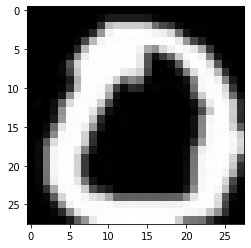

In [ ]:
## Displaying a Ekush Image

import matplotlib.pyplot as plt 
import numpy as np

show_img = train_data[0][0].numpy().reshape(28, 28)
plt.imshow(show_img, cmap=matplotlib.cm.binary)

In [ ]:
# One Image Size
print(train_data[0][0].size())
print(train_data[0][0].numpy().shape)
# First Image Label
print(train_data[59][1])

torch.Size([1, 28, 28])
(1, 28, 28)
0


In [ ]:
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, x):
        logits  = self.linear(x)
        probas = torch.sigmoid(logits)
        return logits, probas
        

In [ ]:
'''
INSTANTIATE MODEL CLASS
'''
model = LogisticRegressionModel(input_size=input_dim,
                                num_classes=output_dim)

# To enable GPU
model.to(device)

LogisticRegressionModel(
  (linear): Linear(in_features=784, out_features=2, bias=True)
)

In [ ]:
# INSTANTIATE OPTIMIZER CLASS
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
# INSTANTIATE OPTIMIZER CLASS

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


In [ ]:
#Settings1
'''
TRAIN THE MODEL
'''
iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        logits, probas = model(images) 

        # Calculate Loss: PyTorch implementation of CrossEntropyLoss works with logits, not probabilities
        loss = F.cross_entropy(logits, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                logits, probas = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(probas, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 0.6965370178222656. Accuracy: 52.86831812255541
Iteration: 1000. Loss: 0.6841707825660706. Accuracy: 54.85658409387223
Iteration: 1500. Loss: 0.7233657836914062. Accuracy: 54.72620599739244
Iteration: 2000. Loss: 0.6804596781730652. Accuracy: 55.80182529335072
Iteration: 2500. Loss: 0.6924183368682861. Accuracy: 56.29074315514993
Iteration: 3000. Loss: 0.6711245775222778. Accuracy: 56.22555410691004
Iteration: 3500. Loss: 0.6983843445777893. Accuracy: 56.22555410691004


In [ ]:
#Settings2
'''
TRAIN THE MODEL
'''
iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        logits, probas = model(images) 

        # Calculate Loss: PyTorch implementation of CrossEntropyLoss works with logits, not probabilities
        loss = F.cross_entropy(logits, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                logits, probas = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(probas, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 0.6645141839981079. Accuracy: 57.39895697522816
Iteration: 1000. Loss: 0.6620786190032959. Accuracy: 56.551499348109516
Iteration: 1500. Loss: 0.6536939144134521. Accuracy: 58.21382007822686
Iteration: 2000. Loss: 0.6486493945121765. Accuracy: 58.53976531942634
Iteration: 2500. Loss: 0.6568686962127686. Accuracy: 58.2464146023468
Iteration: 3000. Loss: 0.6774804592132568. Accuracy: 58.083441981747065
Iteration: 3500. Loss: 0.6288185715675354. Accuracy: 57.82268578878748


In [ ]:
#Settings3
'''
TRAIN THE MODEL
'''
iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        logits, probas = model(images) 

        # Calculate Loss: PyTorch implementation of CrossEntropyLoss works with logits, not probabilities
        loss = F.cross_entropy(logits, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                logits, probas = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(probas, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 0.6851708292961121. Accuracy: 58.57235984354629
Iteration: 1000. Loss: 0.6784543395042419. Accuracy: 58.44198174706649
Iteration: 1500. Loss: 0.6645649671554565. Accuracy: 58.865710560625814
Iteration: 2000. Loss: 0.6545795202255249. Accuracy: 58.865710560625814
Iteration: 2500. Loss: 0.6921948790550232. Accuracy: 59.32203389830509
Iteration: 3000. Loss: 0.6461582779884338. Accuracy: 58.80052151238592
Iteration: 3500. Loss: 0.651991605758667. Accuracy: 58.865710560625814
Iteration: 4000. Loss: 0.6508583426475525. Accuracy: 58.63754889178618


In [ ]:
#Settings4
'''
TRAIN THE MODEL
'''
iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        logits, probas = model(images) 

        # Calculate Loss: PyTorch implementation of CrossEntropyLoss works with logits, not probabilities
        loss = F.cross_entropy(logits, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                logits, probas = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(probas, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 0.6692367196083069. Accuracy: 58.702737940026076
Iteration: 1000. Loss: 0.6840881109237671. Accuracy: 58.833116036505864
Iteration: 1500. Loss: 0.6671575903892517. Accuracy: 59.55019556714472
Iteration: 2000. Loss: 0.6651075482368469. Accuracy: 59.452411994784875
Iteration: 2500. Loss: 0.638191282749176. Accuracy: 59.90873533246415
Iteration: 3000. Loss: 0.6619880199432373. Accuracy: 59.38722294654498
Iteration: 3500. Loss: 0.654695987701416. Accuracy: 59.61538461538461


In [ ]:
#Settings5
'''
TRAIN THE MODEL
'''
iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        logits, probas = model(images) 

        # Calculate Loss: PyTorch implementation of CrossEntropyLoss works with logits, not probabilities
        loss = F.cross_entropy(logits, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                logits, probas = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(probas, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 0.6868993639945984. Accuracy: 56.29074315514993
Iteration: 1000. Loss: 0.7138556241989136. Accuracy: 60.00651890482399
Iteration: 1500. Loss: 0.6897763609886169. Accuracy: 59.71316818774446
Iteration: 2000. Loss: 0.6814044117927551. Accuracy: 60.071707953063886


[0.6868993639945984, 0.7138556241989136, 0.6897763609886169, 0.6814044117927551]


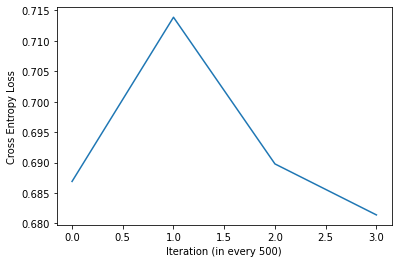

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

In [ ]:
#settings 1
save_model = True

if save_model is True:
    # Saves only parameters
    # wights & biases
    torch.save(model.state_dict(), PATH + 'Ekush_logistic.pkl') 

In [ ]:
#settings 2
save_model = True

if save_model is True:
    # Saves only parameters
    # wights & biases
    torch.save(model.state_dict(), PATH + 'Ekush_logistic2.pkl') 

In [ ]:
#settings 3
save_model = True

if save_model is True:
    # Saves only parameters
    # wights & biases
    torch.save(model.state_dict(), PATH + 'Ekush_logistic3.pkl') 

In [ ]:
#settings 4
save_model = True

if save_model is True:
    # Saves only parameters
    # wights & biases
    torch.save(model.state_dict(), PATH + 'Ekush_logistic4.pkl') 

In [ ]:
#settings 5
save_model = True

if save_model is True:
    # Saves only parameters
    # wights & biases
    torch.save(model.state_dict(), PATH + 'Ekush_logistic5.pkl') 

In [ ]:
#settings 1
load_model = True

if load_model is True:
    model.load_state_dict(torch.load(PATH + 'Ekush_logistic.pkl'))
    print('Trained Model Loaded')

Trained Model Loaded


In [ ]:
#settings 2
load_model = True

if load_model is True:
    model.load_state_dict(torch.load(PATH + 'Ekush_logistic2.pkl'))
    print('Trained Model Loaded')

Trained Model Loaded


In [ ]:
#settings 3
load_model = True

if load_model is True:
    model.load_state_dict(torch.load(PATH + 'Ekush_logistic3.pkl'))
    print('Trained Model Loaded')

In [ ]:
#settings 4
load_model = True

if load_model is True:
    model.load_state_dict(torch.load(PATH + 'Ekush_logistic4.pkl'))
    print('Trained Model Loaded')

			label
	 1    	 1    	 0    	 0    	 0    

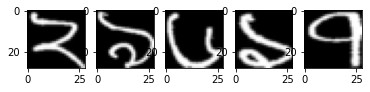

In [ ]:
for images, labels in test_loader:
   break
    
fig, ax = plt.subplots(1,5)
for i in range(5):
    ax[i].imshow(images[i].view(28, 28), cmap=matplotlib.cm.binary)
print('\t\t\t'+'label')   
for i in range(5):
  print('\t',labels [i].numpy(),'   ',end = '')
plt.show()

In [ ]:
_, predictions = model.forward(images[:5].view(-1, 28*28).to(device))
predictions = torch.argmax(predictions, dim=1)
print('Predicted labels', predictions.cpu().numpy())

Predicted labels [1 1 0 1 1]


###Loss plots for hyperparameter settings 1 and 2:
<div align="center">
<img src="https://drive.google.com/uc?id=1eakS_wWxnyFZGFx5Y6NI5iXeeB-EgdXc" width="360">
<img src="https://drive.google.com/uc?id=1XdQ2B479bI13HHT9srPXDgQUFw2-1_wu" width="350">
</div>
Loss plots for hyperparameter settings 3 and 4:
<div align="center">
<img src="https://drive.google.com/uc?id=1utwKKHiWM-zvnTzWOXvl61Ri8YymPIJF" width="340">
<img src="https://drive.google.com/uc?id=1zWKpGJHoaqLFtEwPW4DR8NrGcD78Vjty" width="330">
</div>
Loss plot for hyperparameter settings 5
<div align="center">
<img src="https://drive.google.com/uc?id=1tQE0Oe2yvuWMjjqahLOZz3Q_sSAU92f4" width="340">

</div>

**Result table:-**

| Settings| Batch Size    | Iteration     | Learning Rate |  Optimzer           |  Accuracy(%)|
|:--------:| :----------: | :-----------: | : -----------:|:-----:      |:-----------:|
| 1        | 200          | 4000          | 0.0001        |  SGD    |  56.225     |
| 2        | 200          | 4000          | 0.0003        |  ADAM    |  57.822     |
| 3        | 300          | 5000          | 0.0004        |  ADAM   |  58.637     |
| 4        | 300          | 4000          | 0.0002        |  ADAM   |  59.615     |
| 5        | 500          | 2500          | 0.004         |  ADAM    |  60.071     |

###Hyperparameters settings 1
For setting 1 a smaller batch size was taken of 200 and lr was set to 0.0001,the number of epochs were 26.The accuracy was 56.225%
###Hyperparameters settings 2
Now For setting 2 keeping the batch size same the lr was changed to 0.0003 so the model will learn slower than setting 1 .The number of epochs were same as setting 1 which is 26.The accuracy was 57.822% which is a little improvement.
###Hyperparameters settings 3
In case of setting 3 the batch size was changed to 300 and iteration was 5000 instead of 4000.The lr was reduced even further to 0.0004.The number of epochs were 48.This time the accuracy improved to 58.637%.
###Hyperparameters settings 4
In case of setting 4 the batch size was same as setting 3 but the iteration was reduced to 4000 and the lr was set to 0.0002 to make the model learn little faster.Number of epochs were  39 .The accuray was 59.165%
###Hyperparameters settings 5
The batch size was increased to 500 as from previous settings it can be seen that with increasing batch size the accuracy improves.The number of epochs were 40.And the accuracy was 60.071%




**Best Model**

- Model Name: **Ekush_logistic5.pkl**

- Batch Size: **500**
- Iteration: **2500**

- Learning Rate: **0.004**
- Epochs:**40**
- Accuracy: **60.071**


###Prediction

When trying to predict the the label most of the time model is able to correctly predict **3** out of **5** lables.